# INSTALL NECESSARY PACKAGES

In [2]:
pip install tensorflow scikit-learn pillow matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


# IMPORT PACKAGES

In [3]:
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.metrics.pairwise import cosine_similarity
from PIL import Image
import matplotlib.pyplot as plt
import concurrent.futures

# Load the VGG16 pre-trained model for feature extraction


In [4]:
base_model = VGG16(weights='imagenet', include_top=False, pooling='avg')

In [5]:
def extract_features(img_paths, model):
    """Extract features from a batch of images using VGG16."""
    img_batch = []
    
    for img_path in img_paths:
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        img_batch.append(x)
    
    # Convert list to NumPy array and preprocess input
    img_batch = np.array(img_batch)
    img_batch = preprocess_input(img_batch)
    
    # Extract features in batch
    features = model.predict(img_batch)
    return features

In [6]:
def load_dataset_images(image_folder, batch_size=32):
    """Load all images in the dataset and extract their features in batches."""
    feature_list = []
    img_paths = []

    all_img_files = os.listdir(image_folder)
    
    for i in range(0, len(all_img_files), batch_size):
        batch_img_files = all_img_files[i:i+batch_size]
        batch_img_paths = [os.path.join(image_folder, img_file) for img_file in batch_img_files]
        batch_features = extract_features(batch_img_paths, base_model)
        
        feature_list.extend(batch_features)
        img_paths.extend(batch_img_paths)
    
    return np.array(feature_list), img_paths

In [7]:
def parallel_load_images(image_folder, batch_size=32):
    """Parallel loading and processing of images."""
    all_img_files = os.listdir(image_folder)
    img_paths = [os.path.join(image_folder, img_file) for img_file in all_img_files]
    
    with concurrent.futures.ThreadPoolExecutor() as executor:
        batches = [img_paths[i:i + batch_size] for i in range(0, len(img_paths), batch_size)]
        features_list = list(executor.map(lambda batch: extract_features(batch, base_model), batches))
    
    # Flatten the list of features and concatenate
    feature_list = np.concatenate(features_list, axis=0)
    return feature_list, img_paths


In [8]:
def get_similar_images(input_img_path, dataset_features, img_paths, top_n=10):
    """Given an input image, find top N similar images."""
    input_features = extract_features([input_img_path], base_model)
    similarities = cosine_similarity(input_features, dataset_features)
    
    # Get indices of top N most similar images
    similar_img_indices = np.argsort(similarities[0])[::-1][:top_n]
    
    # Get paths of similar images
    similar_imgs = [img_paths[idx] for idx in similar_img_indices]
    
    return similar_imgs



In [9]:
def display_images(input_img_path, similar_img_paths):
    """Display input image and recommended similar images."""
    input_img = Image.open(input_img_path)
    
    plt.figure(figsize=(20, 5))
    
    # Show input image
    plt.subplot(1, len(similar_img_paths) + 1, 1)
    plt.imshow(input_img)
    plt.title("Input Image")
    plt.axis('off')
    
    # Show similar images
    for i, img_path in enumerate(similar_img_paths):
        similar_img = Image.open(img_path)
        plt.subplot(1, len(similar_img_paths) + 1, i + 2)
        plt.imshow(similar_img)
        plt.title(f"Similar {i+1}")
        plt.axis('off')
    
    plt.show()

# TRAIN THE MODEL

In [10]:
image_folder = r"C:\Users\Tamilselvan M\Desktop\‎ ‎ ‎ ‎ ‎ ‎ ‎\all(2024)\dl-EXPET\exp-10\images"
dataset_features, img_paths = parallel_load_images(image_folder)

1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 29s 29s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 31s 31s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 33s 33s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 34s 34s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 43s 43s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 52s 52s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 54s 54s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 57s 57s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 58s 58s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 41s 41s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 66s 66s/step
1/1 ━━━━━━━━

# PREDICTION

In [13]:
n=int(input("ENter the number of recommed item"))

ENter the number of recommed item 10


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


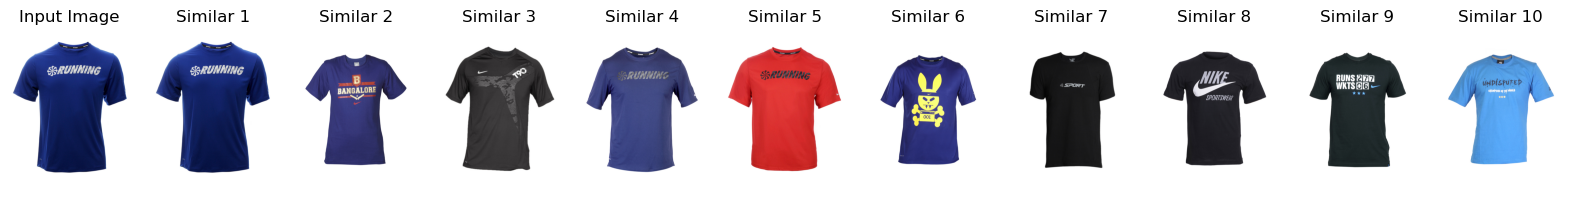

In [14]:
input_img_path = r"C:\Users\Tamilselvan M\Desktop\‎ ‎ ‎ ‎ ‎ ‎ ‎\all(2024)\dl-EXPET\exp-10\images\9983.jpg"
    
    # Get the top 10 similar images based on input
similar_images = get_similar_images(input_img_path, dataset_features, img_paths, top_n=n)
    
    # Display input image and similar images
display_images(input_img_path, similar_images)